In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import numpy as np
import os
import joblib

In [251]:
df =  pd.read_csv('dataset_completo_con_ratios.csv')
df['category_id']
#df.head()

0        26
1        24
2        10
3        17
4        25
         ..
38911    10
38912    10
38913    10
38914    24
38915    10
Name: category_id, Length: 38916, dtype: int64

In [252]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_weekday'] = df['publish_time'].dt.dayofweek  # 0 = lunes, 6 = domingo
df['publish_month'] = df['publish_time'].dt.month
#df['publish_weekday'] = df['publish_time'].dt.day_name()
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,category_title,like_ratio,total_interactions,trending_clasify,views_per_comment,dislikes_adj,like_dislike_ratio,publish_hour,publish_weekday,publish_month
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515.000,55681.000,8093.75,...,Howto & Style,0.873088,73253.750,Base,762.160038,8093.75,6.879506,7,4,11
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.000,25561.000,2294.00,...,Entertainment,0.917645,30612.000,Base,382.166123,2294.00,11.142546,6,6,11
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",8831780.375,276377.625,8093.75,...,Music,0.971548,306556.625,Alta,399.894969,8093.75,34.147042,17,4,11
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 02:30:38+00:00,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.000,193.000,12.00,...,Sports,0.941463,242.000,Base,752.243243,12.00,16.083333,2,0,11
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13+00:00,[none],9815.000,30.000,2.00,...,News & Politics,0.937500,62.000,Base,327.166667,2.00,15.000000,1,0,11


In [253]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry', 'category_title', 'like_ratio', 'total_interactions',
       'trending_clasify', 'views_per_comment', 'dislikes_adj',
       'like_dislike_ratio', 'publish_hour', 'publish_weekday',
       'publish_month'],
      dtype='object')

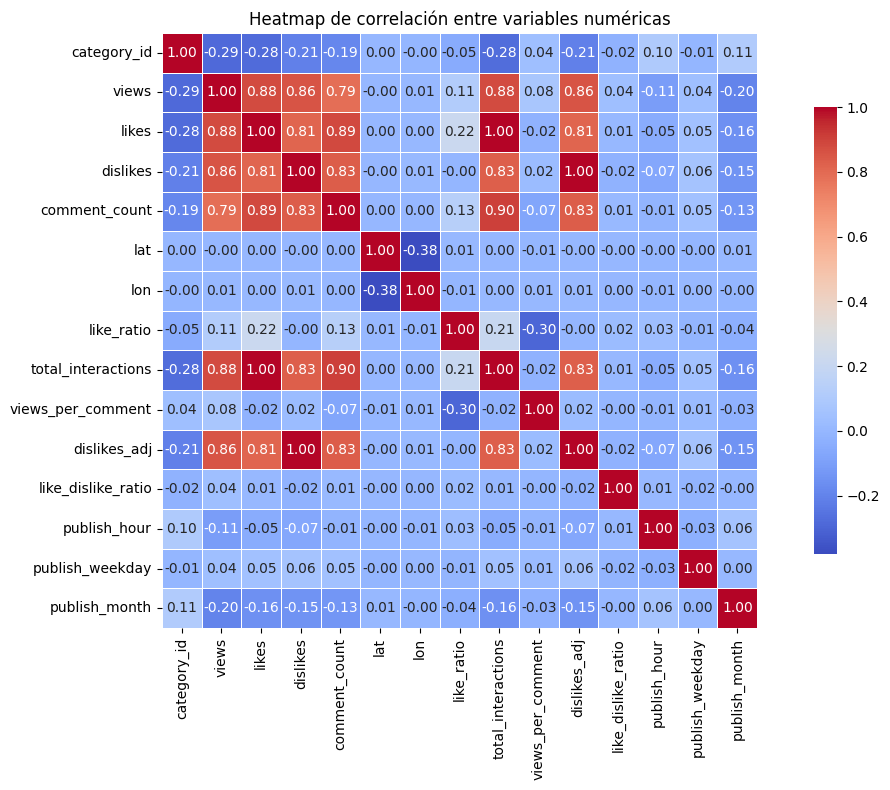

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas (correlación solo aplica a valores numéricos)
numericas = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numericas.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            linewidths=0.5, cbar_kws={"shrink": .75})

plt.title('Heatmap de correlación entre variables numéricas')
plt.tight_layout()
plt.show()


In [289]:
X = df[[
    'category_id', 'comment_count', 
     'video_error_or_removed','like_ratio',
    'publish_hour', 'publish_weekday'
]]
y = df['views']

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)#distribucion de rango 

In [304]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [305]:
y_pred = rfr.predict(X_test)

In [306]:
y_pred

array([7983469.2 ,  302248.44,  193758.37, ..., 1991583.73,  165459.58,
        966126.61])

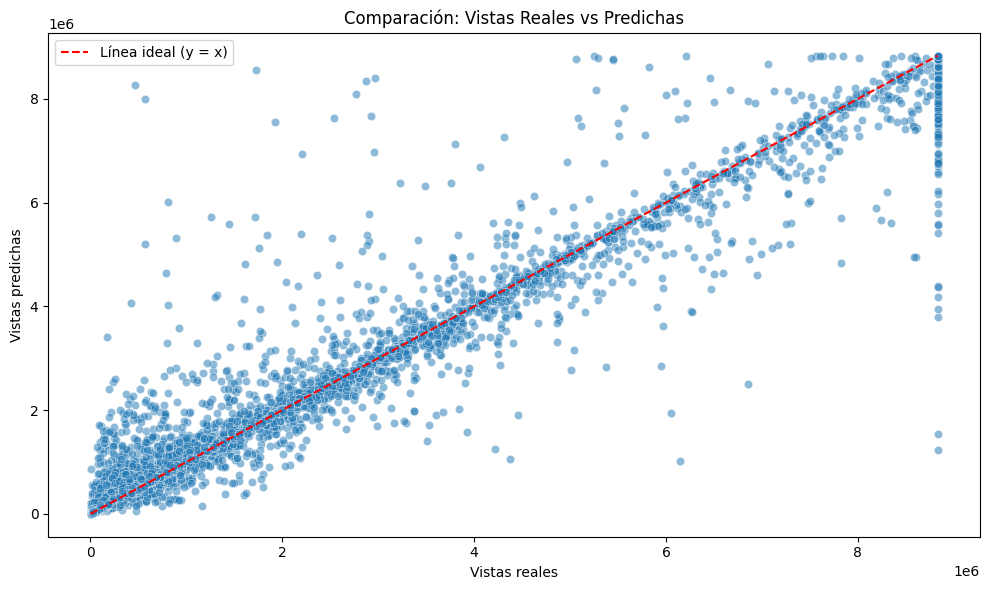

In [310]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea ideal (y = x)')
plt.xlabel('Vistas reales')
plt.ylabel('Vistas predichas')
plt.title('Comparación: Vistas Reales vs Predichas')
plt.legend()
plt.tight_layout()
plt.show()

In [307]:
mean_absolute_error(y_pred, y_test)

212424.48901614948

In [308]:
mean_squared_error(y_pred, y_test)

300273280666.4191

In [309]:
r2_score(y_pred, y_test)

0.9669715131457582

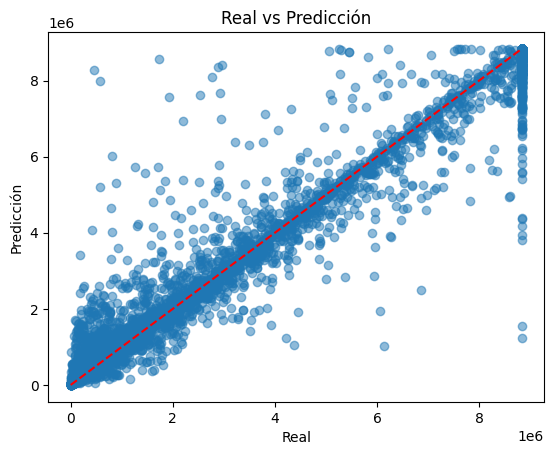

In [311]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.title("Real vs Predicción")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



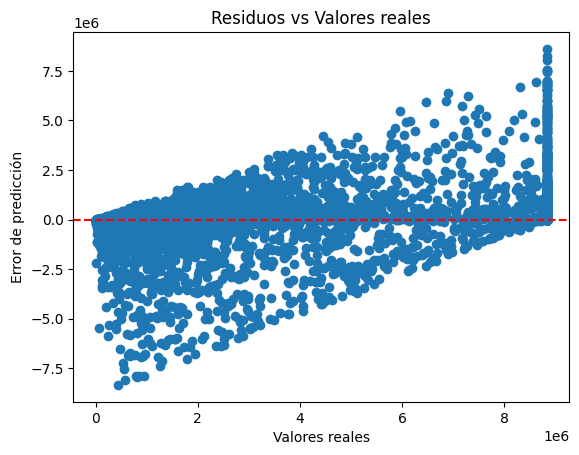

In [207]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Valores reales")
plt.xlabel("Valores reales")
plt.ylabel("Error de predicción")
plt.show()
